Group and sum by metaprogram problem solved with: https://stackoverflow.com/questions/39650749/group-by-sparse-matrix-in-scipy-and-return-a-matrix

## All programs

#### Load modules

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import os

import scanpy as sc
import squidpy as sq

import scipy

from sklearn.preprocessing import LabelBinarizer

import warnings
warnings.filterwarnings("ignore")

In [2]:
directory = '/n/scratch3/users/c/cao385/Xenium/Neighbors_Analysis/all_programs'
if not os.path.exists(directory):
    os.makedirs(directory)

#### Concatenating all samples

In [3]:
samples = ['11EP22-2', 'BT1743-1', '3EP8-3', '7EP1-2', '7EP41-3', 'BT2126_Region_4', 'BT2169-1', 'BT1804', 'BT775-2', 'BT1717-1']

path = ['/n/scratch3/users/c/cao385/Xenium/20230817__215519__epn_DJSN_81723/output-XETG00083__0010702__11EP22-2__20230817__215655',
        '/n/scratch3/users/c/cao385/Xenium/20230817__215519__epn_DJSN_81723/output-XETG00083__0010702__BT1743-1__20230817__215655', 
        '/n/scratch3/users/c/cao385/Xenium/20231102__215055__7EP1_7EP41_3EP8/output-XETG00083__0010619__Region_3__20231102__215155', 
        '/n/scratch3/users/c/cao385/Xenium/20231102__215055__7EP1_7EP41_3EP8/output-XETG00083__0010619__Region_5__20231102__215155', 
        '/n/scratch3/users/c/cao385/Xenium/20231102__215055__7EP1_7EP41_3EP8/output-XETG00083__0010575__Region_3__20231102__215155', 
        '/n/scratch3/users/c/cao385/Xenium/20231020__200939__BT2126_BT1745/output-XETG00083__0010652__Region_4__20231020__201259',
        '/n/scratch3/users/c/cao385/Xenium/20231109__203408__BT1804_BT2169/output-XETG00083__0010498__Region_1__20231109__203421',
        '/n/scratch3/users/c/cao385/Xenium/20231109__203408__BT1804_BT2169/output-XETG00083__0010775__Region_1__20231109__203421',
        '/n/scratch3/users/c/cao385/Xenium/20231107__203958__BT1717_BT775/output-XETG00083__0010501__Region_2__20231107__204035',
        '/n/scratch3/users/c/cao385/Xenium/20231107__203958__BT1717_BT775/output-XETG00083__0010814__Region_1__20231107__204035']

metadata = ['/n/scratch3/users/d/dj83/Xenium/metadata_11EP22-2.csv', 
            '/n/scratch3/users/d/dj83/Xenium/metadata_BT1743-1.csv', 
            '/n/scratch3/users/d/dj83/Xenium/metadata_3EP8-3.csv', 
            '/n/scratch3/users/d/dj83/Xenium/metadata_7EP1-2.csv', 
            '/n/scratch3/users/d/dj83/Xenium/metadata_7EP41-3.csv', 
            '/n/scratch3/users/d/dj83/Xenium/metadata_BT2126_Region_4.csv',
            '/n/scratch3/users/d/dj83/Xenium/metadata_BT2169-1.csv',
            '/n/scratch3/users/d/dj83/Xenium/metadata_BT1804.csv',
            '/n/scratch3/users/d/dj83/Xenium/metadata_BT775-2.csv',
            '/n/scratch3/users/d/dj83/Xenium/metadata_BT1717-1.csv']


anndata_list = []
for i in range(len(samples)):
    adata = sc.read_10x_h5(filename = path[i]+'/cell_feature_matrix.h5')
    df = pd.read_csv(path[i]+'/cells.csv.gz')
    
    df.set_index(adata.obs_names, inplace=True)
    adata.obs = df.copy()
    
    #adata.obsm["spatial"] = adata.obs[["x_centroid", "y_centroid"]].copy().to_numpy()
    adata.obsm["spatial"] = np.array([adata.obs.x_centroid*0.325, adata.obs.y_centroid*0.325]).transpose().astype('float64')
    
    anno = pd.read_csv(metadata[i], index_col = 0)
    if 'X' in anno.columns:
        anno.index = anno['X']
    
    adata = adata[anno.index,:]
    
    adata.obs['Metaprogram'] = anno['Metaprogram']
    adata.obs['sample'] = samples[i]
    
    anndata_list.append(adata)
    
    print(samples[i])

adata = sc.concat(anndata_list)    

11EP22-2
BT1743-1
3EP8-3
7EP1-2
7EP41-3
BT2126_Region_4
BT2169-1
BT1804
BT775-2
BT1717-1


#### Plotting spatial neighbors for each sample

11EP22-2


<Figure size 5000x5000 with 0 Axes>

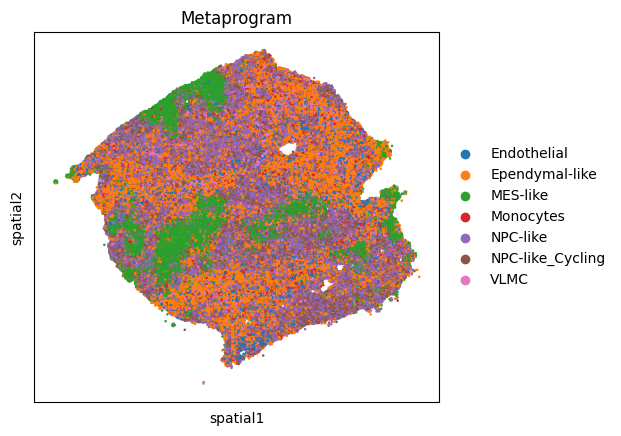

BT1743-1


<Figure size 5000x5000 with 0 Axes>

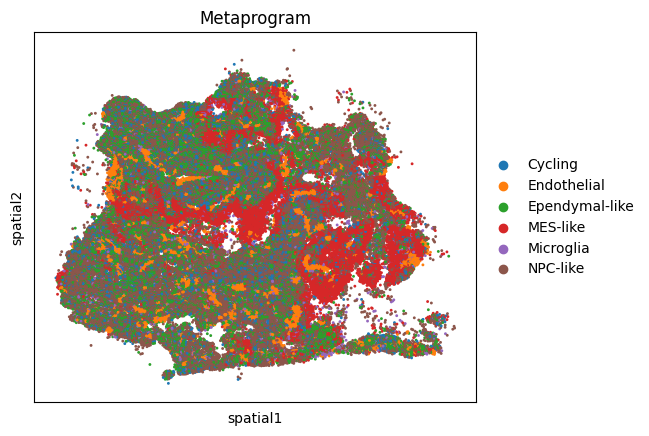

3EP8-3


<Figure size 5000x5000 with 0 Axes>

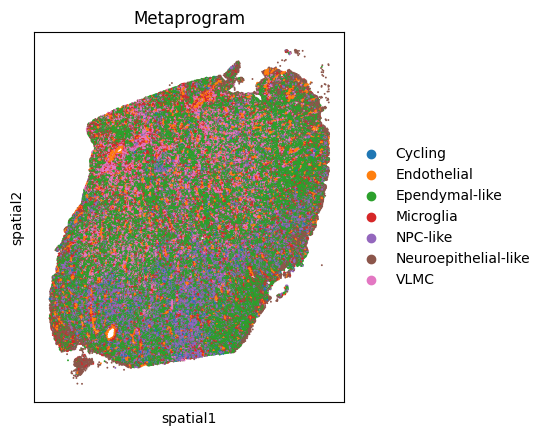

7EP1-2


<Figure size 5000x5000 with 0 Axes>

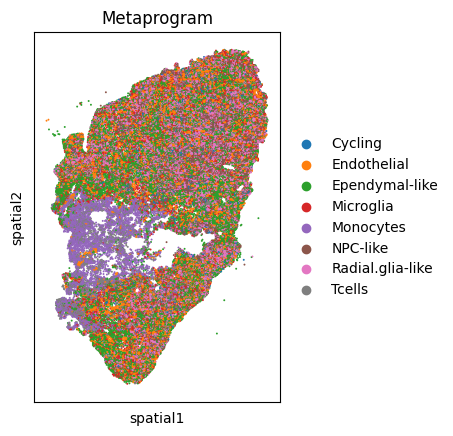

7EP41-3


<Figure size 5000x5000 with 0 Axes>

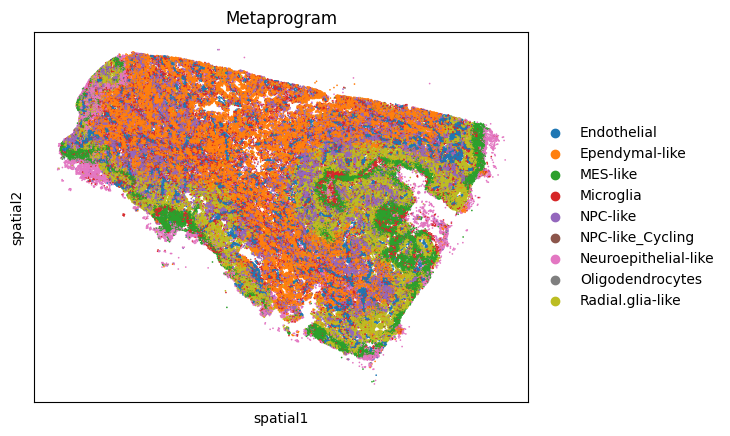

BT2126_Region_4


<Figure size 5000x5000 with 0 Axes>

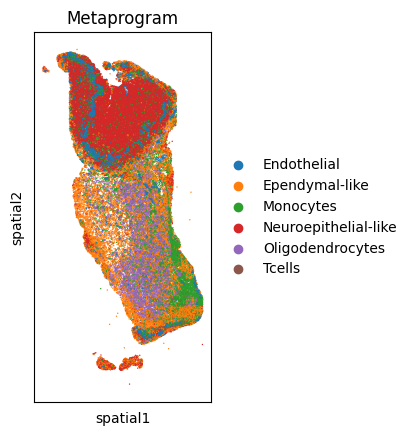

BT2169-1


<Figure size 5000x5000 with 0 Axes>

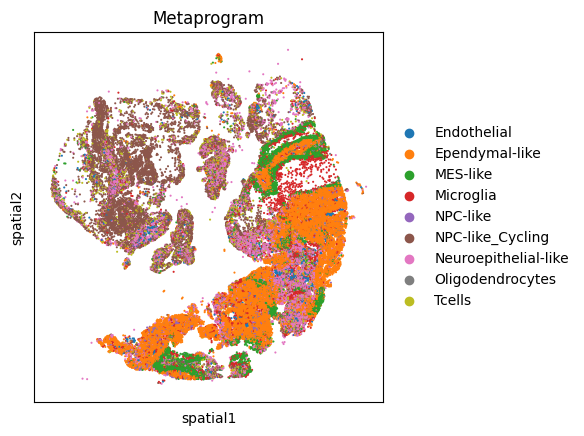

BT1804


<Figure size 5000x5000 with 0 Axes>

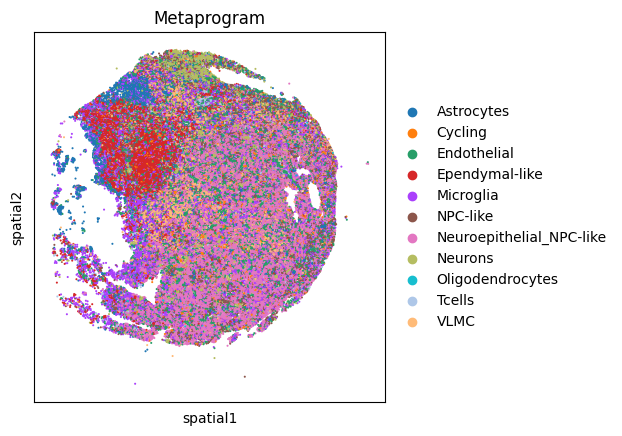

BT775-2


<Figure size 5000x5000 with 0 Axes>

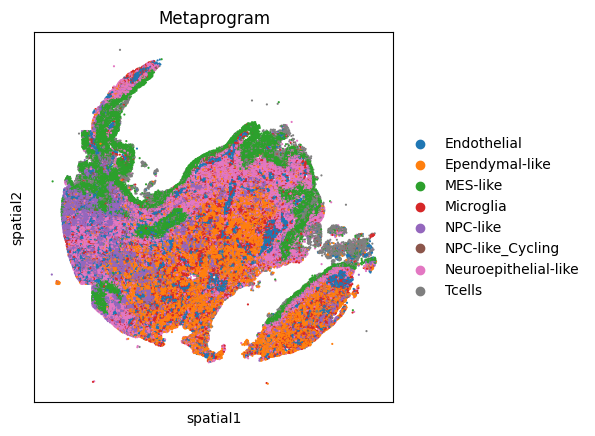

BT1717-1


<Figure size 5000x5000 with 0 Axes>

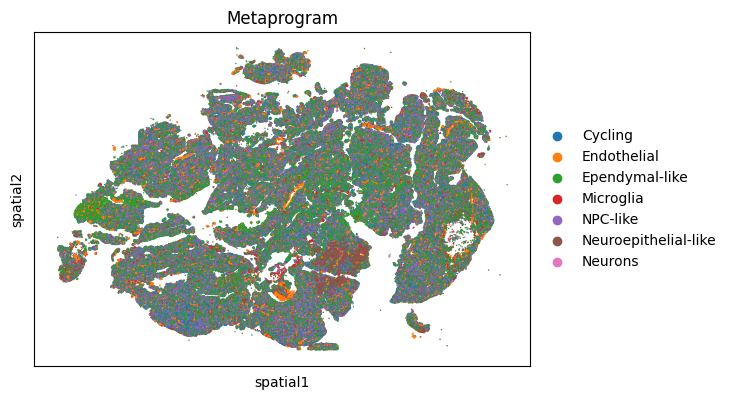

In [4]:
for samp in adata.obs['sample'].unique():
    asub=adata[adata.obs['sample']==samp]
    print(samp)
    plt.figure(figsize=(50,50))
    sc.pl.spatial(
    asub,
    color="Metaprogram",
    neighbors_key="spatial_neighbors",
    spot_size=10,
    edges=False,
    edges_width=2,
    img_key=None,
    )

In [5]:
np.unique(adata.obs['Metaprogram'])

array(['Astrocytes', 'Cycling', 'Endothelial', 'Ependymal-like',
       'MES-like', 'Microglia', 'Monocytes', 'NPC-like',
       'NPC-like_Cycling', 'Neuroepithelial-like',
       'Neuroepithelial_NPC-like', 'Neurons', 'Oligodendrocytes',
       'Radial.glia-like', 'Tcells', 'VLMC'], dtype=object)

In [6]:
ad = adata

#### Calculates spatial neighbor for each sample and concatenating it

In [7]:
anndata_list = []
for sample in ad.obs['sample'].unique():
    adata_copy_int = ad[ad.obs['sample'] == sample ]
    adata_copy_int.obs.index = list(pd.DataFrame(list((adata_copy_int.obs['sample'])))[0] +'_' +pd.DataFrame(list((adata_copy_int.obs.index)))[0])
    sq.gr.spatial_neighbors(adata_copy_int, coord_type = 'generic', radius = 70.0)
        
    #lb = LabelBinarizer(sparse_output=True)
    #grouped = lb.fit_transform(adata_copy_int.obs['Metaprogram']).T.dot((adata_copy_int.obsp['spatial_distances']>0)*1)
    #neighmatrix = pd.DataFrame(data = scipy.sparse.csr_matrix.todense(grouped)).transpose()
    #neighmatrix.set_axis(sorted(adata_copy_int.obs['Metaprogram'].unique()), axis="columns", inplace=True)
    
    #datf = pd.DataFrame(data = scipy.sparse.csr_matrix.todense((adata_copy_int.obsp['spatial_distances']>0)*1))
    #datf['key'] = list(adata_copy_int.obs['Metaprogram'])
    #neighmatrix = datf.groupby('key').sum().transpose()
    
    if len(adata_copy_int.obs.groupby('Metaprogram').size()) == 2:
        datf = pd.DataFrame(data = scipy.sparse.csr_matrix.todense((adata_copy_int.obsp['spatial_distances']>0)*1))
        datf['key'] = list(adata_copy_int.obs['Metaprogram'])
        neighmatrix = datf.groupby('key').sum().transpose()
    else:
        lb = LabelBinarizer(sparse_output=True)
        grouped = lb.fit_transform(adata_copy_int.obs['Metaprogram'].to_numpy()).T.dot((adata_copy_int.obsp['spatial_distances']>0)*1)
        neighmatrix = pd.DataFrame(data = scipy.sparse.csr_matrix.todense(grouped)).transpose()
        neighmatrix.set_axis(sorted(adata_copy_int.obs['Metaprogram'].unique()), axis = "columns", copy = False)
    
    adataneigh = sc.AnnData(neighmatrix)
    adataneigh.obs = adata_copy_int.obs
    adataneigh.obs['counts'] = list(np.sum(neighmatrix,axis=1))
    anndata_list.append(adataneigh)
    print(sample)

11EP22-2
BT1743-1
3EP8-3
7EP1-2
7EP41-3
BT2126_Region_4
BT2169-1
BT1804
BT775-2
BT1717-1


In [8]:
ad_sp_concat = sc.concat(anndata_list, pairwise = True, join = 'outer')

In [9]:
adataneigh = ad_sp_concat
adataneigh.obsm["spatial"] = np.array([adataneigh.obs.x_centroid*0.325, adataneigh.obs.y_centroid*0.325]).transpose().astype('float64')
adataneigh.X = np.nan_to_num(adataneigh.X)

In [10]:
adataneigh = adataneigh[adataneigh.obs['counts'] > 6]

In [11]:
adataneigh.raw = adataneigh

#### Save h5ad file with results

In [12]:
adataneigh.write(directory+'/merged.h5ad')

In [13]:
#sc.pp.neighbors(adataneigh, n_neighbors=8)
#sc.tl.leiden(adataneigh,resolution=0.3,key_added='clusters')
#sc.tl.umap(adataneigh, min_dist = 0.1)

In [14]:
#sc.pl.umap(adataneigh,color=['sample'],palette='Spectral')

#### Compute centrality scores

In [15]:
sq.gr.spatial_neighbors(adataneigh, coord_type = "generic", delaunay = True)

In [16]:
sq.gr.centrality_scores(adataneigh, cluster_key = "Metaprogram")

ERROR: Unable to fetch palette, reason: 'Metaprogram_colors'. Using `None`.


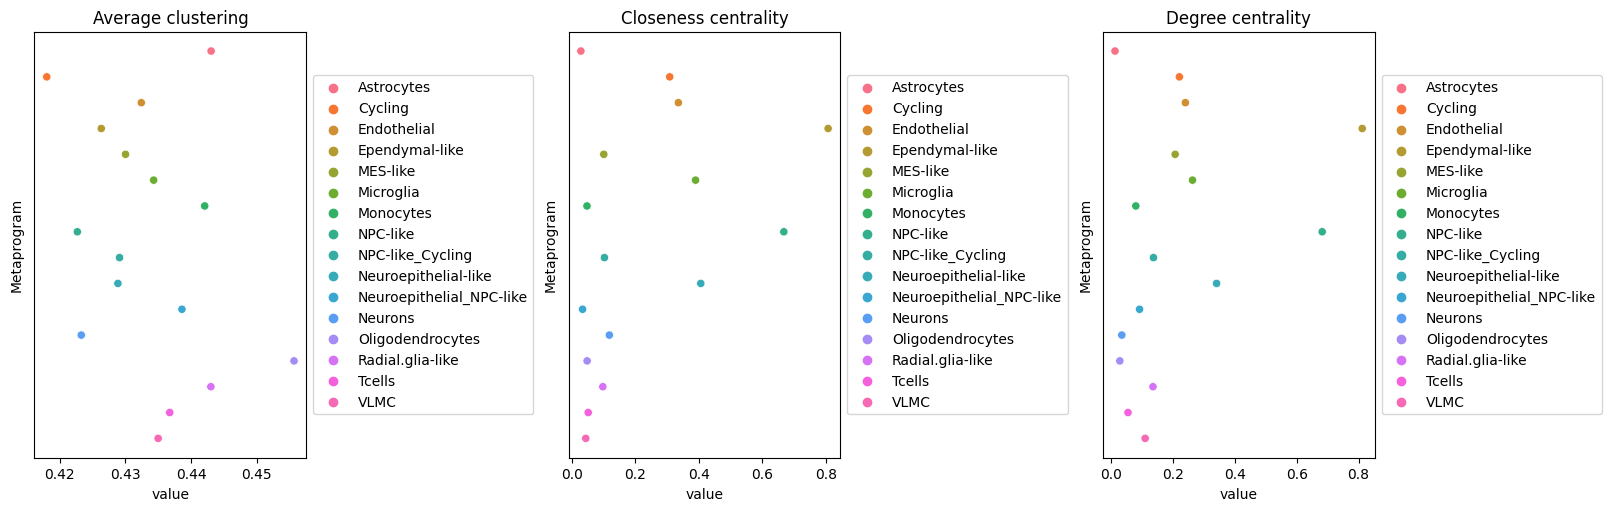

In [17]:
sq.pl.centrality_scores(adataneigh, cluster_key = "Metaprogram", figsize = (16, 5))

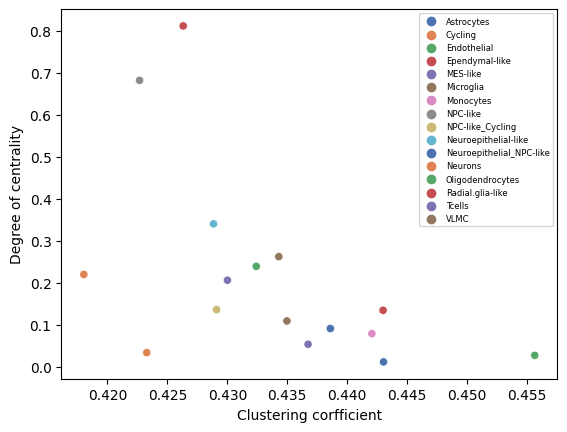

In [18]:
dt = adataneigh.uns['Metaprogram_centrality_scores']
dt['Metaprogram'] = dt.index

pt = sns.scatterplot(data = dt, x = "average_clustering", y = "degree_centrality", hue = "Metaprogram", palette = "deep")
pt.set(xlabel = 'Clustering corfficient', ylabel = 'Degree of centrality')
pt.legend(fontsize = 6)
plt.savefig(directory+"/centrality_scores.pdf")
plt.show()

In [19]:
df = adataneigh.uns['Metaprogram_centrality_scores']
df.to_csv(directory+'/centrality_scores.csv')

#### Neighbors enrichment analysis

In [20]:
sq.gr.nhood_enrichment(adataneigh, cluster_key = "Metaprogram", seed = 1234)

  0%|          | 0/1000 [00:00<?, ?/s]

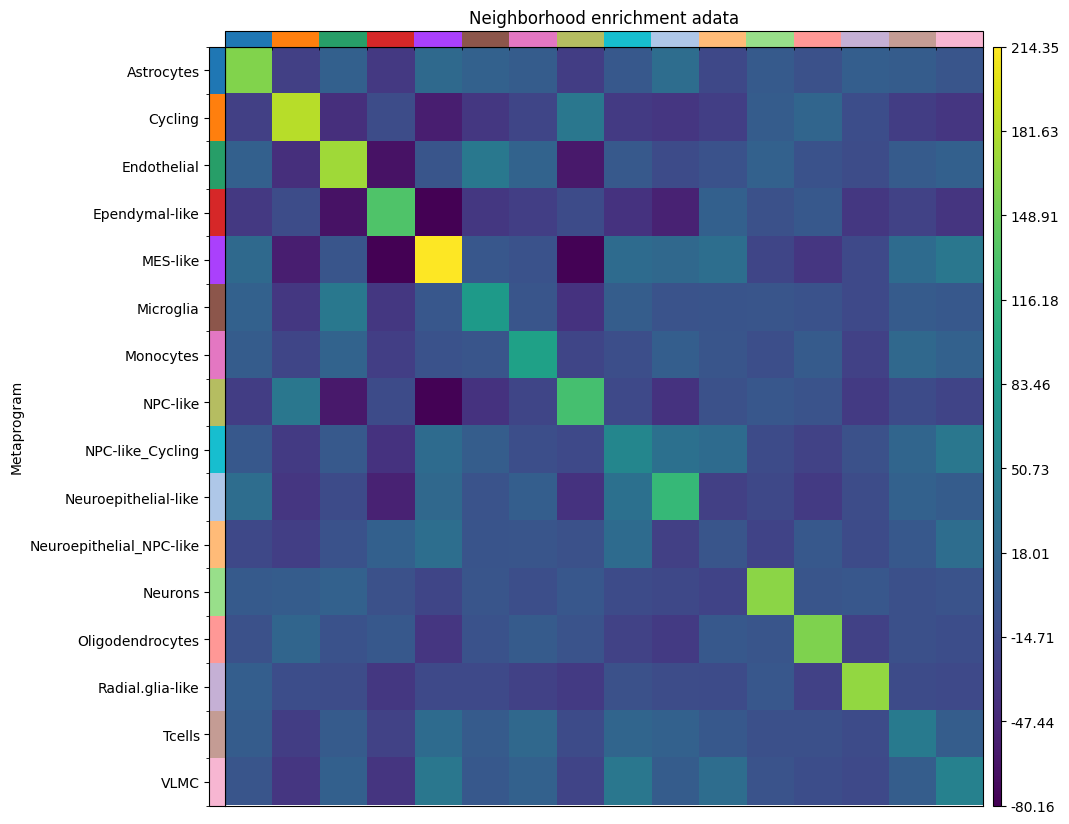

In [21]:
sq.pl.nhood_enrichment(
    adataneigh,
    cluster_key = "Metaprogram",
    figsize = (8, 8),
    title = "Neighborhood enrichment adata"
)

In [22]:
df_zscore = pd.DataFrame(adataneigh.uns['Metaprogram_nhood_enrichment']['zscore'])
df_counts = pd.DataFrame(adataneigh.uns['Metaprogram_nhood_enrichment']['count'])

df_zscore.to_csv(directory+'/nhood_enrichment_zscore.csv')
df_counts.to_csv(directory+'/nhood_enrichment_counts.csv')

#### Dotplot for fusions per metaprogram

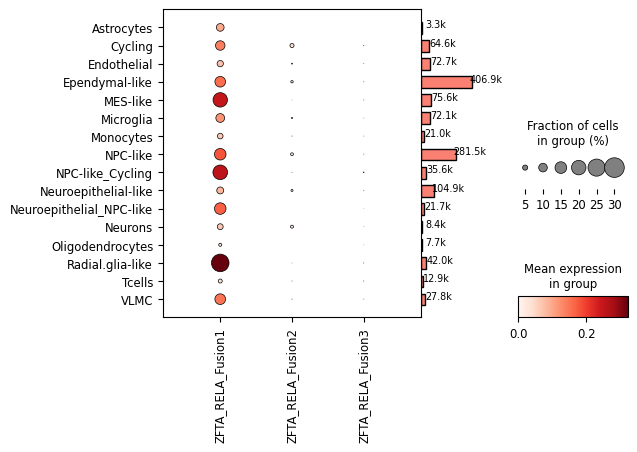

In [23]:
markers = ['ZFTA_RELA_Fusion1', 'ZFTA_RELA_Fusion2', 'ZFTA_RELA_Fusion3']
dp = sc.pl.dotplot(adata, markers, 'Metaprogram', figsize = (6, 4), return_fig = True)
dp.add_totals().style(dot_edge_color = 'black', dot_edge_lw = 0.5, cmap = 'Reds')
dp.savefig(directory+"/dotplot_fusions.pdf")

## Malignant programs only

#### Load modules

In [24]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import os

import scanpy as sc
import squidpy as sq

import scipy

from sklearn.preprocessing import LabelBinarizer

import warnings
warnings.filterwarnings("ignore")

In [25]:
directory = '/n/scratch3/users/c/cao385/Xenium/Neighbors_Analysis/malignant_programs'
if not os.path.exists(directory):
    os.makedirs(directory)

In [26]:
samples = ['11EP22-2', 'BT1743-1', '3EP8-3', '7EP1-2', '7EP41-3', 'BT2126_Region_4', 'BT2169-1', 'BT1804', 'BT775-2', 'BT1717-1']

path = ['/n/scratch3/users/c/cao385/Xenium/20230817__215519__epn_DJSN_81723/output-XETG00083__0010702__11EP22-2__20230817__215655',
        '/n/scratch3/users/c/cao385/Xenium/20230817__215519__epn_DJSN_81723/output-XETG00083__0010702__BT1743-1__20230817__215655', 
        '/n/scratch3/users/c/cao385/Xenium/20231102__215055__7EP1_7EP41_3EP8/output-XETG00083__0010619__Region_3__20231102__215155', 
        '/n/scratch3/users/c/cao385/Xenium/20231102__215055__7EP1_7EP41_3EP8/output-XETG00083__0010619__Region_5__20231102__215155', 
        '/n/scratch3/users/c/cao385/Xenium/20231102__215055__7EP1_7EP41_3EP8/output-XETG00083__0010575__Region_3__20231102__215155', 
        '/n/scratch3/users/c/cao385/Xenium/20231020__200939__BT2126_BT1745/output-XETG00083__0010652__Region_4__20231020__201259',
        '/n/scratch3/users/c/cao385/Xenium/20231109__203408__BT1804_BT2169/output-XETG00083__0010498__Region_1__20231109__203421',
        '/n/scratch3/users/c/cao385/Xenium/20231109__203408__BT1804_BT2169/output-XETG00083__0010775__Region_1__20231109__203421',
        '/n/scratch3/users/c/cao385/Xenium/20231107__203958__BT1717_BT775/output-XETG00083__0010501__Region_2__20231107__204035',
        '/n/scratch3/users/c/cao385/Xenium/20231107__203958__BT1717_BT775/output-XETG00083__0010814__Region_1__20231107__204035']

metadata = ['/n/scratch3/users/d/dj83/Xenium/metadata_11EP22-2.csv', 
            '/n/scratch3/users/d/dj83/Xenium/metadata_BT1743-1.csv', 
            '/n/scratch3/users/d/dj83/Xenium/metadata_3EP8-3.csv', 
            '/n/scratch3/users/d/dj83/Xenium/metadata_7EP1-2.csv', 
            '/n/scratch3/users/d/dj83/Xenium/metadata_7EP41-3.csv', 
            '/n/scratch3/users/d/dj83/Xenium/metadata_BT2126_Region_4.csv',
            '/n/scratch3/users/d/dj83/Xenium/metadata_BT2169-1.csv',
            '/n/scratch3/users/d/dj83/Xenium/metadata_BT1804.csv',
            '/n/scratch3/users/d/dj83/Xenium/metadata_BT775-2.csv',
            '/n/scratch3/users/d/dj83/Xenium/metadata_BT1717-1.csv']


anndata_list = []
for i in range(len(samples)):
    adata = sc.read_10x_h5(filename = path[i]+'/cell_feature_matrix.h5')
    df = pd.read_csv(path[i]+'/cells.csv.gz')
    
    df.set_index(adata.obs_names, inplace=True)
    adata.obs = df.copy()
    
    #adata.obsm["spatial"] = adata.obs[["x_centroid", "y_centroid"]].copy().to_numpy()
    adata.obsm["spatial"] = np.array([adata.obs.x_centroid*0.325, adata.obs.y_centroid*0.325]).transpose().astype('float64')
    
    anno = pd.read_csv(metadata[i], index_col = 0)
    if 'X' in anno.columns:
        anno.index = anno['X']
    
    adata = adata[anno.index,:]
    
    adata.obs['Metaprogram'] = anno['Metaprogram']
    adata.obs['sample'] = samples[i]
    
    anndata_list.append(adata)
    
    print(samples[i])

adata = sc.concat(anndata_list)

11EP22-2
BT1743-1
3EP8-3
7EP1-2
7EP41-3
BT2126_Region_4
BT2169-1
BT1804
BT775-2
BT1717-1


#### Subsetting malignant programs only

In [27]:
adata = adata[adata.obs['Metaprogram'].isin(['Cycling', 'Ependymal-like', 'MES-like', 'NPC-like', 'NPC-like_Cycling', 'Neuroepithelial-like', 'Radial.glia-like', 'Neuroepithelial_NPC-like'])]

#### Plotting spatial neighbors for each sample

11EP22-2


<Figure size 5000x5000 with 0 Axes>

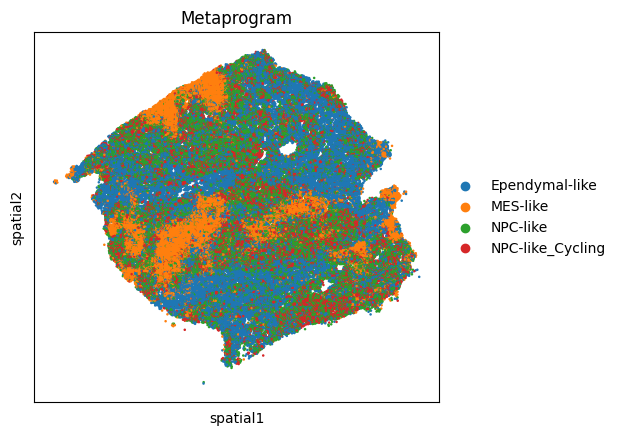

BT1743-1


<Figure size 5000x5000 with 0 Axes>

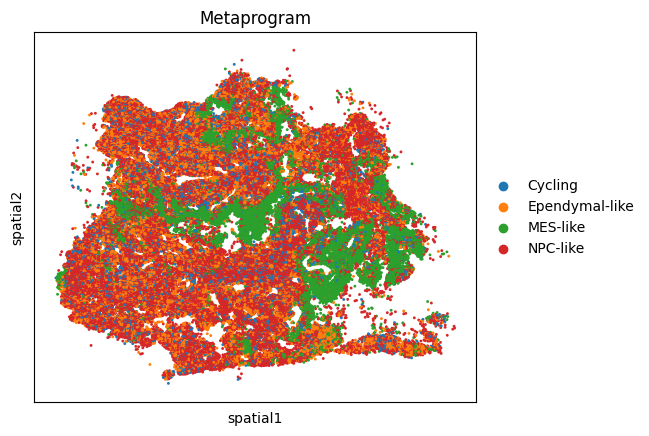

3EP8-3


<Figure size 5000x5000 with 0 Axes>

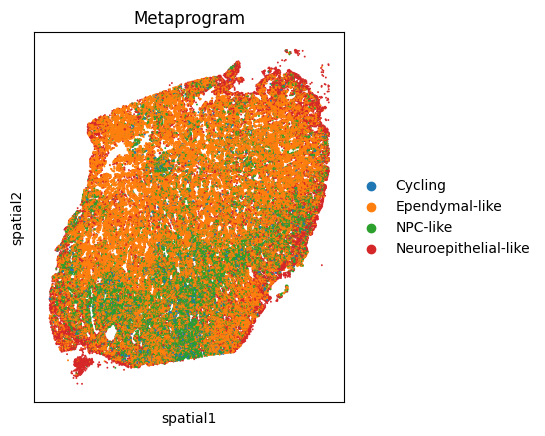

7EP1-2


<Figure size 5000x5000 with 0 Axes>

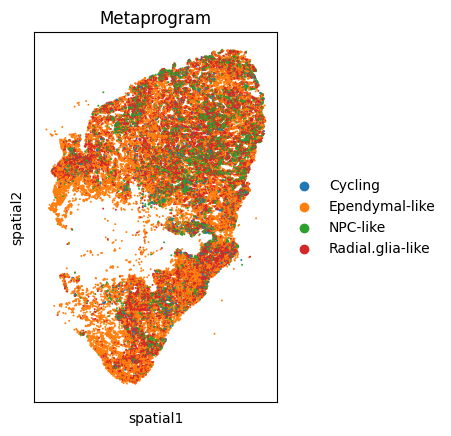

7EP41-3


<Figure size 5000x5000 with 0 Axes>

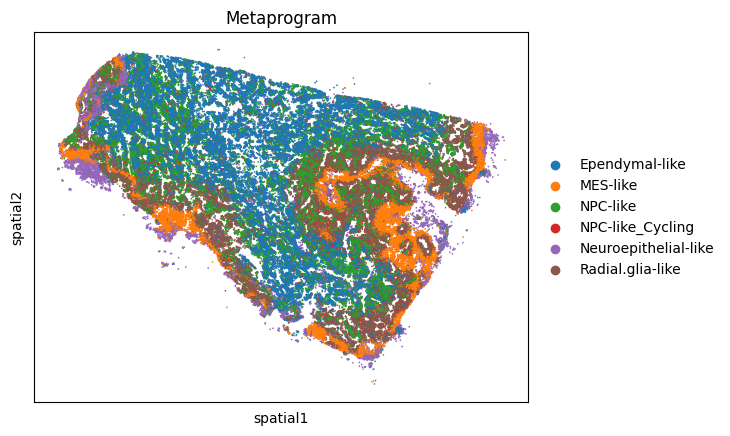

BT2126_Region_4


<Figure size 5000x5000 with 0 Axes>

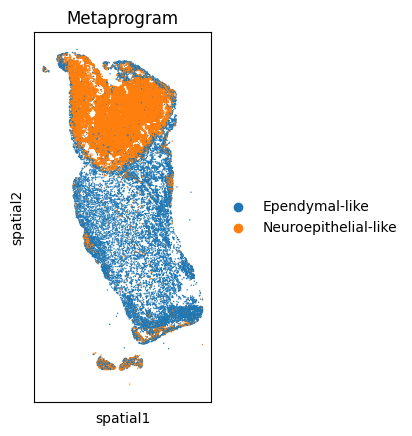

BT2169-1


<Figure size 5000x5000 with 0 Axes>

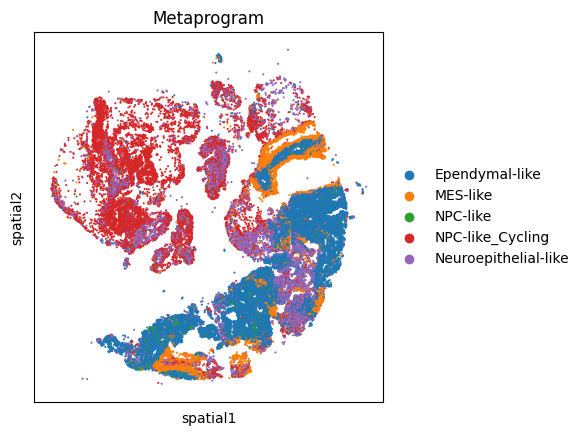

BT1804


<Figure size 5000x5000 with 0 Axes>

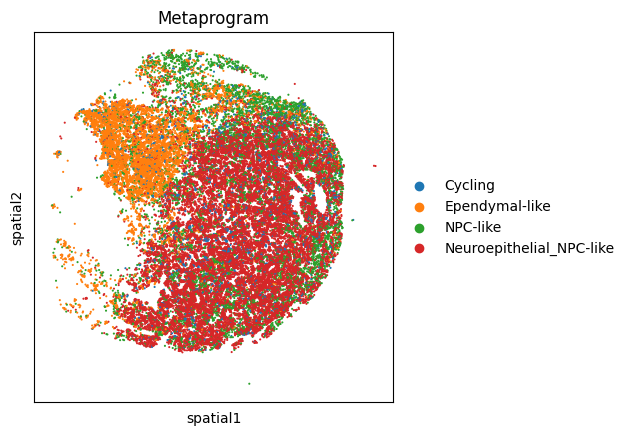

BT775-2


<Figure size 5000x5000 with 0 Axes>

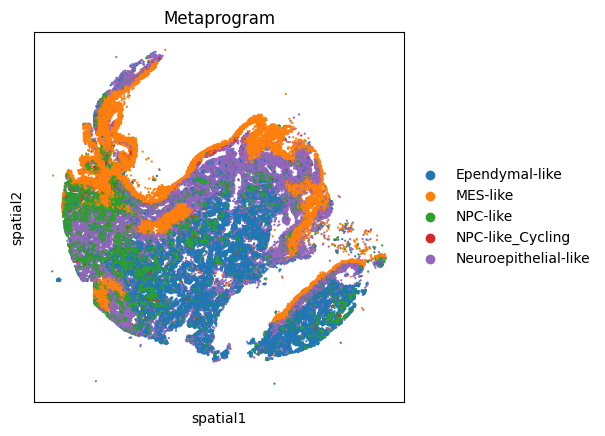

BT1717-1


<Figure size 5000x5000 with 0 Axes>

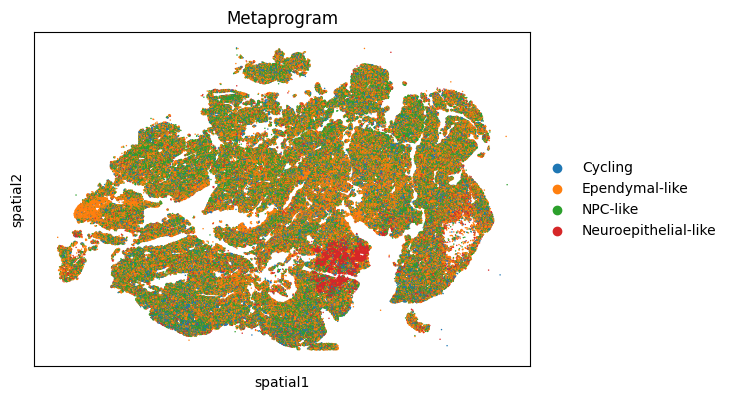

In [28]:
for samp in adata.obs['sample'].unique():
    asub=adata[adata.obs['sample']==samp]
    print(samp)
    plt.figure(figsize=(50,50))
    sc.pl.spatial(
    asub,
    color="Metaprogram",
    neighbors_key="spatial_neighbors",
    spot_size=10,
    edges=False,
    edges_width=2,
    img_key=None,
    )

In [29]:
np.unique(adata.obs['Metaprogram'])

array(['Cycling', 'Ependymal-like', 'MES-like', 'NPC-like',
       'NPC-like_Cycling', 'Neuroepithelial-like',
       'Neuroepithelial_NPC-like', 'Radial.glia-like'], dtype=object)

In [30]:
ad = adata

#### Calculates spatial neighbor for each sample and concatenating it

In [31]:
anndata_list = []
for sample in ad.obs['sample'].unique():
    adata_copy_int = ad[ad.obs['sample'] == sample ]
    adata_copy_int.obs.index = list(pd.DataFrame(list((adata_copy_int.obs['sample'])))[0] +'_' +pd.DataFrame(list((adata_copy_int.obs.index)))[0])
    sq.gr.spatial_neighbors(adata_copy_int, coord_type = 'generic', radius = 70.0)
        
    #lb = LabelBinarizer(sparse_output=True)
    #grouped = lb.fit_transform(adata_copy_int.obs['Metaprogram']).T.dot((adata_copy_int.obsp['spatial_distances']>0)*1)
    #neighmatrix = pd.DataFrame(data = scipy.sparse.csr_matrix.todense(grouped)).transpose()
    #neighmatrix.set_axis(sorted(adata_copy_int.obs['Metaprogram'].unique()), axis="columns", inplace=True)
    
    #datf = pd.DataFrame(data = scipy.sparse.csr_matrix.todense((adata_copy_int.obsp['spatial_distances']>0)*1))
    #datf['key'] = list(adata_copy_int.obs['Metaprogram'])
    #neighmatrix = datf.groupby('key').sum().transpose()
    
    if len(adata_copy_int.obs.groupby('Metaprogram').size()) == 2:
        datf = pd.DataFrame(data = scipy.sparse.csr_matrix.todense((adata_copy_int.obsp['spatial_distances']>0)*1))
        datf['key'] = list(adata_copy_int.obs['Metaprogram'])
        neighmatrix = datf.groupby('key').sum().transpose()
    else:
        lb = LabelBinarizer(sparse_output=True)
        grouped = lb.fit_transform(adata_copy_int.obs['Metaprogram'].to_numpy()).T.dot((adata_copy_int.obsp['spatial_distances']>0)*1)
        neighmatrix = pd.DataFrame(data = scipy.sparse.csr_matrix.todense(grouped)).transpose()
        neighmatrix.set_axis(sorted(adata_copy_int.obs['Metaprogram'].unique()), axis = "columns", copy = False)
    
    adataneigh = sc.AnnData(neighmatrix)
    adataneigh.obs = adata_copy_int.obs
    adataneigh.obs['counts'] = list(np.sum(neighmatrix,axis=1))
    anndata_list.append(adataneigh)
    print(sample)

11EP22-2
BT1743-1
3EP8-3
7EP1-2
7EP41-3
BT2126_Region_4
BT2169-1
BT1804
BT775-2
BT1717-1


In [32]:
ad_sp_concat = sc.concat(anndata_list, pairwise = True, join = 'outer')

In [33]:
adataneigh = ad_sp_concat
adataneigh.obs['Metaprogram'] = adataneigh.obs['Metaprogram'].astype('category')
adataneigh.obsm["spatial"] = np.array([adataneigh.obs.x_centroid*0.325, adataneigh.obs.y_centroid*0.325]).transpose().astype('float64')
adataneigh.X = np.nan_to_num(adataneigh.X)

In [34]:
adataneigh = adataneigh[adataneigh.obs['counts'] > 6]

In [35]:
adataneigh.raw = adataneigh

#### Save h5ad file with results

In [36]:
adataneigh.write(directory+'/merged.h5ad')

In [37]:
#sc.pp.neighbors(adataneigh, n_neighbors=8)
#sc.tl.leiden(adataneigh,resolution=0.3,key_added='clusters')
#sc.tl.umap(adataneigh, min_dist = 0.1)

In [38]:
#sc.pl.umap(adataneigh,color=['sample'],palette='Spectral')

#### Compute centrality scores

In [39]:
sq.gr.spatial_neighbors(adataneigh, coord_type = "generic", delaunay = True)

In [40]:
sq.gr.centrality_scores(adataneigh, cluster_key = "Metaprogram")

ERROR: Unable to fetch palette, reason: 'Metaprogram_colors'. Using `None`.


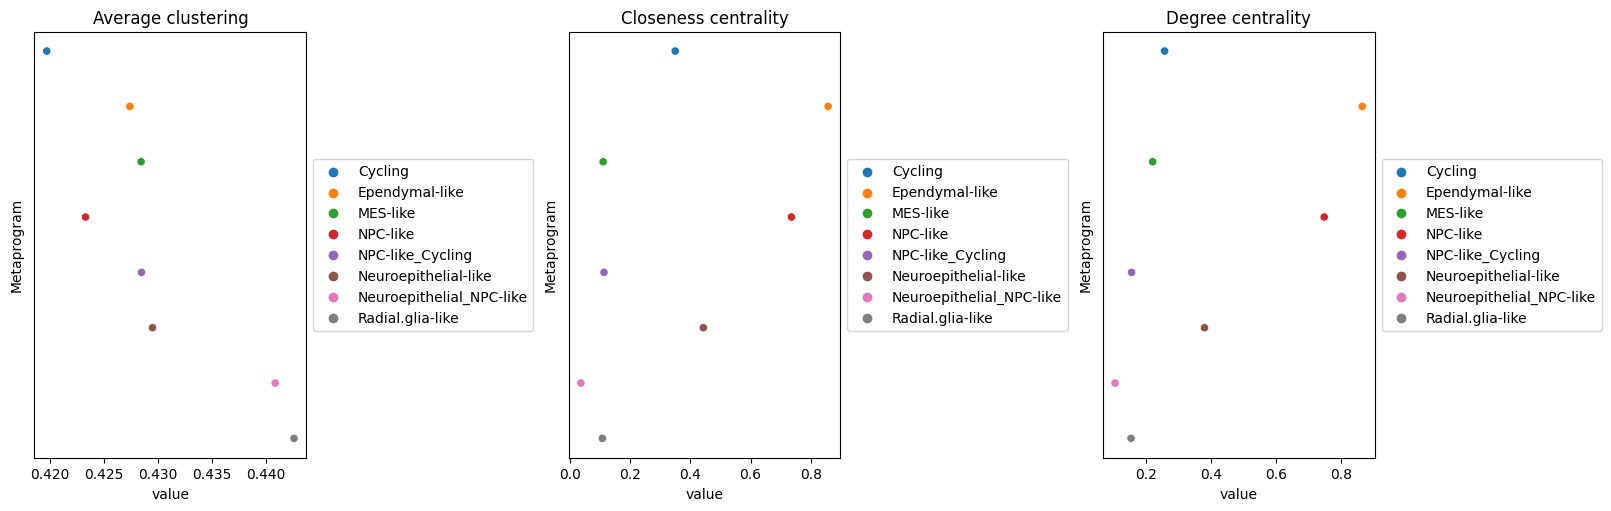

In [41]:
sq.pl.centrality_scores(adataneigh, cluster_key = "Metaprogram", figsize = (16, 5))

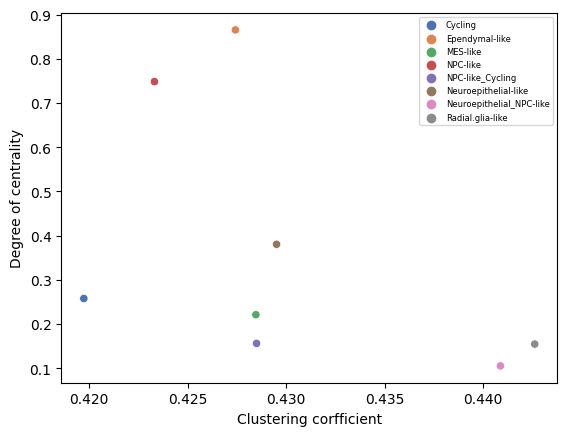

In [42]:
dt = adataneigh.uns['Metaprogram_centrality_scores']
dt['Metaprogram'] = dt.index

pt = sns.scatterplot(data = dt, x = "average_clustering", y = "degree_centrality", hue = "Metaprogram", palette = "deep")
pt.set(xlabel = 'Clustering corfficient', ylabel = 'Degree of centrality')
pt.legend(fontsize = 6)
plt.savefig(directory+"/centrality_scores.pdf")
plt.show()

In [43]:
df = adataneigh.uns['Metaprogram_centrality_scores']
df.to_csv(directory+'/centrality_scores.csv')

#### Neighbors enrichment analysis

In [44]:
sq.gr.nhood_enrichment(adataneigh, cluster_key = "Metaprogram", seed = 1234)

  0%|          | 0/1000 [00:00<?, ?/s]

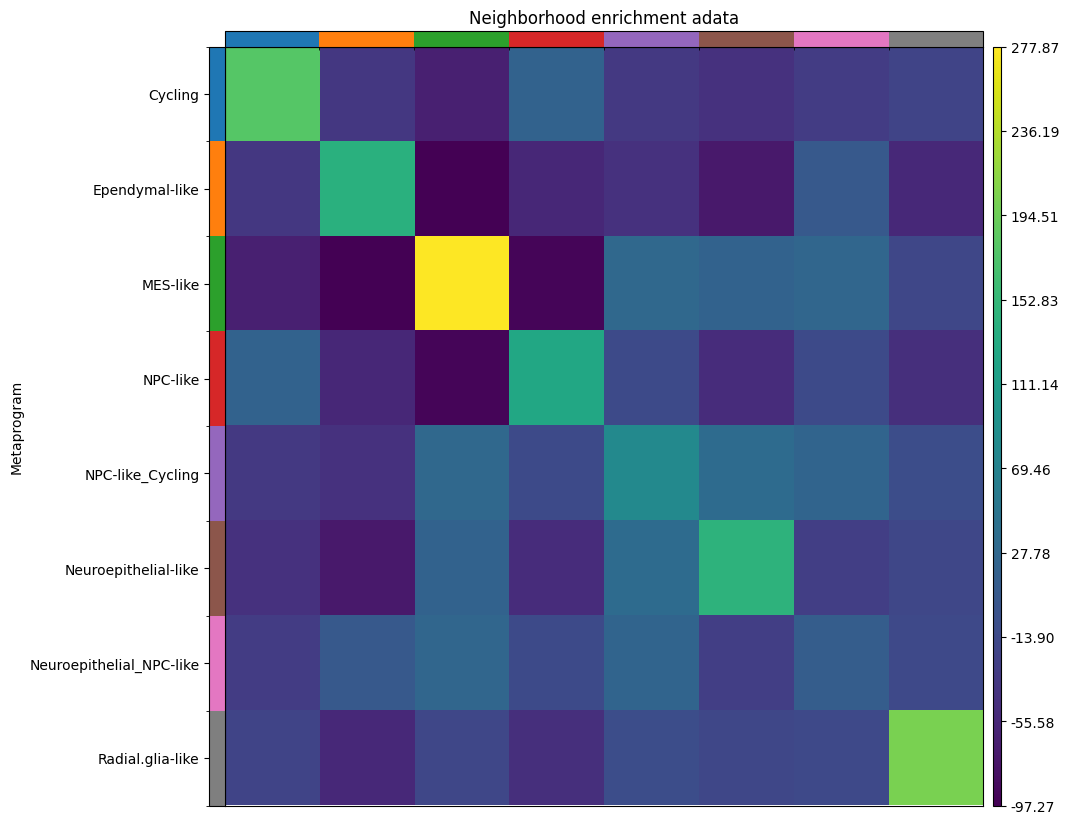

In [45]:
sq.pl.nhood_enrichment(
    adataneigh,
    cluster_key = "Metaprogram",
    figsize = (8, 8),
    title = "Neighborhood enrichment adata"
)

In [46]:
df_zscore = pd.DataFrame(adataneigh.uns['Metaprogram_nhood_enrichment']['zscore'])
df_counts = pd.DataFrame(adataneigh.uns['Metaprogram_nhood_enrichment']['count'])

df_zscore.to_csv(directory+'/nhood_enrichment_zscore.csv')
df_counts.to_csv(directory+'/nhood_enrichment_counts.csv')

#### Dotplot for fusions per metaprogram

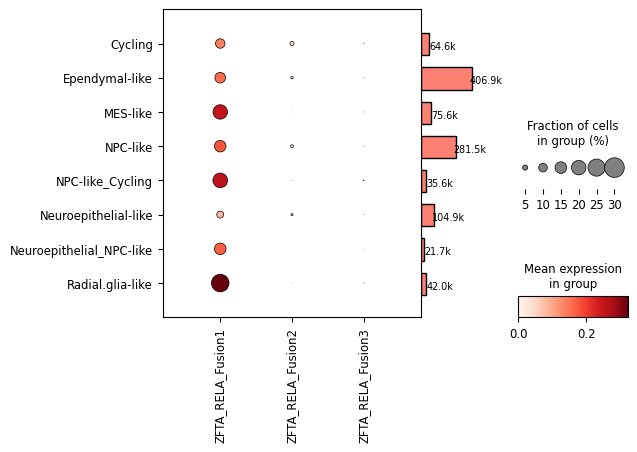

In [47]:
markers = ['ZFTA_RELA_Fusion1', 'ZFTA_RELA_Fusion2', 'ZFTA_RELA_Fusion3']
dp = sc.pl.dotplot(adata, markers, 'Metaprogram', figsize = (6, 4), return_fig = True)
dp.add_totals().style(dot_edge_color = 'black', dot_edge_lw = 0.5, cmap = 'Reds')
dp.savefig(directory+"/dotplot_fusions.pdf")

In [48]:
#genedf = sc.get.obs_df(adata, keys=["Metaprogram", *markers])
#grouped = genedf.groupby("Metaprogram")
#mean = grouped.mean()
#mean.to_csv(directory+'/dotplot_mean.csv')

In [49]:
#plot = sc.pl._baseplot_class.BasePlot(adata, markers, groupby = 'Metaprogram').add_totals()
#pd.DataFrame(plot.plot_group_extra['counts_df']).to_csv(directory+'/dotplot_ncells.csv')

In [50]:
#pd.DataFrame(dp.dot_size_df).to_csv(directory+'/dotplot_size.csv')